In [1]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv
from matplotlib import cm

In [2]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start, mu=None):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        self.mu=mu
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            if not self.mu:
                x_mp=self.x+dt/2*f(self.x,self.t)
                self.x=self.x+dt*f(x_mp,self.t+dt/2)
            else:
                x_mp=self.x+dt/2*f(self.x,self.t, self.mu)
                self.x=self.x+dt*f(x_mp,self.t+dt/2,self.mu)
            
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                

# van der pol oscillator
Initially was $$ \dfrac{\mathrm{d^2} x}{\mathrm{d} t^2} - \mu(1-x^2)\dfrac{\mathrm{d} x}{\mathrm{d} t} + x = 0 $$

Now made into a first order differential equation
$$\begin{cases} \dfrac{\mathrm{d} x}{\mathrm{d} t}= v(t) \\
                \dfrac{\mathrm{d}v(t)}{\mathrm{d}t}= -x + \mu(1-x^2) v(t)\end{cases}$$

In [164]:
# Function for van der pol osscilator
def f(x,t,mu):
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[1]
    z[1]=-x[0] + mu*(1-x[0]**2)*x[1]
    
    return z

In [180]:
def full_process_vdp(mu,x,N,mu_vals=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(N):
        NM=Numerical_methods(f)         
        dt=0.001                          
        N_iter=int(10/dt)               

        X_mp=np.zeros([2,N_iter])
        x_start=[-2,0]
        t_start=0
        
        if mu_vals == None:
            NM2.Initialise(x_start,t_start,mu) 
        else:
            NM2.Initialise(x_start,t_start,mu_vals[i]) 
        X_mp,ts=NM2.MidPoint(dt,N_iter)
        plt.plot(X_mp[0,:],X_mp[1,:],color='b',linewidth=2)


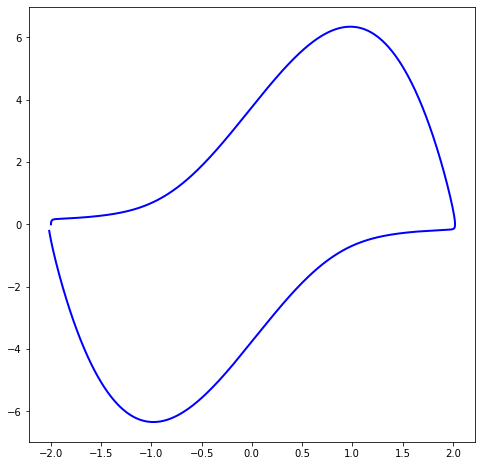

In [181]:
full_process_vdp(4,[-2,0],1)


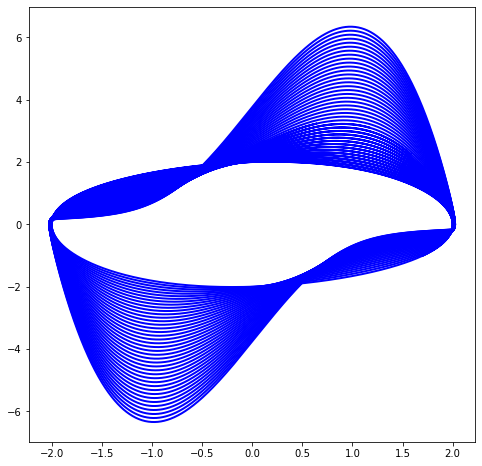

In [182]:
# plotting van der pol with different mu values
mu_vals = list(np.arange(1,41)*0.1) # 1 -> 4 with step of 0.1 e.g. [0.1,0.2,0.3,...,3.9,4.0]
full_process_vdp(4,[-2,0],len(mu_vals),mu_vals=mu_vals)